In [185]:
import numpy as np


shape, scale = 2, 80.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 100000000)

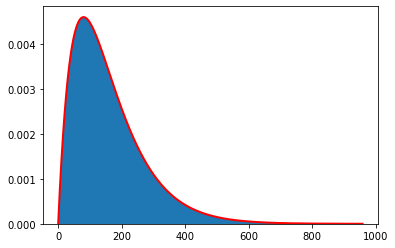

In [186]:
import matplotlib.pyplot as plt
import scipy.special as sps  

binsq = range(0,960)
count, bins, ignored = plt.hist(s, binsq, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
# plt.xlim(0,480)
plt.show()

In [187]:
np.where(y == y.max())

(array([80]),)

In [100]:
np.repeat(0.,480)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [101]:
yy = np.concatenate((y,np.repeat(0.,480)), axis=0)

In [191]:
np.where(yy == yy.max())

(array([80]),)

In [188]:
np.save('gamma_k2_theta80.npy', y)

In [189]:
yy = np.load('gamma_k2_theta80.npy')

In [190]:
yy.max()

0.004598493014643029

In [192]:
np.roll(yy, -80+3)

array([4.59517772e-03, 4.59703181e-03, 4.59813075e-03, 4.59849301e-03,
       4.59813674e-03, 4.59707971e-03, 4.59533941e-03, 4.59293296e-03,
       4.58987718e-03, 4.58618859e-03, 4.58188336e-03, 4.57697740e-03,
       4.57148629e-03, 4.56542532e-03, 4.55880951e-03, 4.55165356e-03,
       4.54397192e-03, 4.53577876e-03, 4.52708797e-03, 4.51791318e-03,
       4.50826775e-03, 4.49816479e-03, 4.48761715e-03, 4.47663745e-03,
       4.46523805e-03, 4.45343106e-03, 4.44122837e-03, 4.42864164e-03,
       4.41568228e-03, 4.40236151e-03, 4.38869029e-03, 4.37467940e-03,
       4.36033937e-03, 4.34568055e-03, 4.33071308e-03, 4.31544687e-03,
       4.29989167e-03, 4.28405700e-03, 4.26795222e-03, 4.25158647e-03,
       4.23496873e-03, 4.21810778e-03, 4.20101223e-03, 4.18369050e-03,
       4.16615086e-03, 4.14840140e-03, 4.13045002e-03, 4.11230449e-03,
       4.09397241e-03, 4.07546119e-03, 4.05677814e-03, 4.03793036e-03,
       4.01892484e-03, 3.99976840e-03, 3.98046773e-03, 3.96102937e-03,
      

In [196]:
import numpy as np


def H(opt, model_size, obs_dens, **kwargs):
    model_grids = np.arange(1, model_size + 1)
    obs_grids = model_grids[model_grids % obs_dens == 0]
    nobsgrid = len(obs_grids)

    nobsgrid = len(obs_grids)
    Hk = np.mat(np.zeros((nobsgrid, model_size)))

    if opt == 'single':
        for iobs in range(0, nobsgrid):
            x1 = obs_grids[iobs] - 1
            Hk[iobs, x1] = 1.0

        return Hk

    elif opt == 'average':
        ave_range = kwargs['ave_range'] * model_size
        if ave_range % 2 != 0:
            raise ValueError('average range * model_size should be an even number')
        else:
            for iobs in range(0, nobsgrid):
                x1 = obs_grids[iobs] - 1
                if x1+int(ave_range/2)+1 > model_size:
                    Hk[iobs, x1-int(ave_range/2):model_size] = 1.0 / (ave_range+1)
                    Hk[iobs, 0:x1+int(ave_range/2)+1-model_size] = 1.0 / (ave_range+1)
                elif x1-int(ave_range/2) < 0:
                    Hk[iobs, 0:x1+int(ave_range/2)+1] = 1.0 / (ave_range+1)
                    Hk[iobs, x1-int(ave_range/2):] = 1.0 / (ave_range+1)        
                else:
                    Hk[iobs, x1-int(ave_range/2):x1+int(ave_range/2)+1] = 1.0 / (ave_range+1)

        return Hk

    elif opt == 'gamma_weighted':
        gamma = kwargs['gamma']
        theta = kwargs['theta']
        for iobs in range(nobsgrid):
            Hk[iobs,:] = np.roll(gamma, -theta+(iobs+1)*obs_dens-1)

        return Hk

    else:
        raise ValueError('wrong option, current options are: \'single\', \'average\', \'gamma_weighted\'')



if __name__ == '__main__':
    # model parameters
    model_size = 960  # N
    # observation parameters
    obs_dens = 4

    gamma = np.load('gamma_k2_theta80.npy')
    Hk = H('gamma_weighted', model_size, obs_dens, gamma=gamma, theta=80)
#     Hk = H('single', model_size, obs_dens)
#     Hk = H('average', model_size, obs_dens,ave_range=0.25)

    print(Hk[1,:])

[[4.57982804e-03 4.58489453e-03 4.58912844e-03 4.59254965e-03
  4.59517772e-03 4.59703181e-03 4.59813075e-03 4.59849301e-03
  4.59813674e-03 4.59707971e-03 4.59533941e-03 4.59293296e-03
  4.58987718e-03 4.58618859e-03 4.58188336e-03 4.57697740e-03
  4.57148629e-03 4.56542532e-03 4.55880951e-03 4.55165356e-03
  4.54397192e-03 4.53577876e-03 4.52708797e-03 4.51791318e-03
  4.50826775e-03 4.49816479e-03 4.48761715e-03 4.47663745e-03
  4.46523805e-03 4.45343106e-03 4.44122837e-03 4.42864164e-03
  4.41568228e-03 4.40236151e-03 4.38869029e-03 4.37467940e-03
  4.36033937e-03 4.34568055e-03 4.33071308e-03 4.31544687e-03
  4.29989167e-03 4.28405700e-03 4.26795222e-03 4.25158647e-03
  4.23496873e-03 4.21810778e-03 4.20101223e-03 4.18369050e-03
  4.16615086e-03 4.14840140e-03 4.13045002e-03 4.11230449e-03
  4.09397241e-03 4.07546119e-03 4.05677814e-03 4.03793036e-03
  4.01892484e-03 3.99976840e-03 3.98046773e-03 3.96102937e-03
  3.94145970e-03 3.92176501e-03 3.90195140e-03 3.88202489e-03
  3.8619

In [197]:
from scipy.io import savemat

savemat('Hk_gamma80.mat', {'Hk':np.array(Hk)})

In [118]:

# model parameters
model_size = 960  # N
# observation parameters
obs_density = 4

# regular temporal / sptial obs
model_grids = np.arange(1, model_size + 1)
obs_grids = model_grids[model_grids % obs_density == 0]
nobsgrid = len(obs_grids)

# make forward operator H
Hk = np.mat(np.zeros((nobsgrid, model_size)))
ave_range = 0.25 * model_size
if ave_range % 2 != 0:
    raise ValueError('average range * model_size should be an even number')
else:
    for iobs in range(0, nobsgrid):
        x1 = obs_grids[iobs] - 1
        if x1+int(ave_range/2)+1 > model_size:
            Hk[iobs, x1-int(ave_range/2):model_size] = 1.0 / (ave_range+1)
            Hk[iobs, 0:x1+int(ave_range/2)+1-model_size] = 1.0 / (ave_range+1)
        elif x1-int(ave_range/2) < 0:
            Hk[iobs, 0:x1+int(ave_range/2)+1] = 1.0 / (ave_range+1)
            Hk[iobs, x1-int(ave_range/2):] = 1.0 / (ave_range+1)        
        else:
            Hk[iobs, x1-int(ave_range/2):x1+int(ave_range/2)+1] = 1.0 / (ave_range+1)


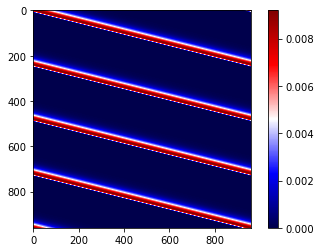

In [135]:
import matplotlib.pyplot as plt


plt.imshow(np.tile(Hk, (4,1)), cmap=plt.cm.seismic)
plt.colorbar()
plt.show()

In [156]:
type(Hk)

numpy.matrix

In [162]:
(np.ones((3,3)) @ np.array([3,1,3])).shape

(3,)

In [168]:
from numpy.linalg import inv

inv(np.array([[2,3],[4,5]]) + np.eye(2,2))

array([[ 1.        , -0.5       ],
       [-0.66666667,  0.5       ]])

In [169]:
np.ones((3,4)).T

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [167]:
np.eye(2,2)

array([[1., 0.],
       [0., 1.]])

In [153]:
op = np.ones((2,3,4))
opt = (np.mean(op[0,:,:],axis=0)).T
(np.ones((3,4)) @ opt)[None,:].shape


(1, 3)